<a href="https://colab.research.google.com/github/bnf99/FiscaComputacional1/blob/main/Tarea_TS09_BNF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea semana 9: Ecuaciones Diferenciales Parciales.
## IF4702 - Física computacional 1 

### Profesores:
> Álvaro Amador Jara

> José Esteban Pérez Hidalgo  

### Estudiante:
> Bryam Gerardo Núñez Flores (2018111986)

### Repositorio:
> [github.com/bnf99/FiscaComputacional1](https://github.com/bnf99/FiscaComputacional1)

### Por cuestiones de formato se recomienda revisar este documento desde el repositorio en Github, Google Collab (se conecta directamente desde el repositorio) o un lector de documentos .ipynb. 

# Descripción de la tarea:

Para la semana 09 del curso, se han cubierto cuatro grandes métodos para obtener la solución numérica de ecuaciones diferenciales parciales (EDP). En particular, los métodos de separación de variables, series de Fourier y diferencias finitas pueden ser aplicados de una forma muy directa, por lo que son excelentes opciones para llevar a cabo dicha labor.

Considere la ecuación de difusión en una dimensión, que se puede ser escrita como:

$$ \frac{\partial \rho(x,t)}{\partial t} = D\frac{\partial^{2}\rho(x,t)}{\partial^{2} x}$$

Para resolver dicha EDP, se proponen las siguientes condiciones de contorno:

> $\rho(0,t)=\rho(L_{x},t)=0$

> $ \rho(x,0)=Ae^{-\frac{(x-x_{0})^{2}}{l}}$

Para completar esta tarea debe escoger dos de los métodos indicados (separación de variables, series de Fourier o diferencias finitas) y generar las soluciones respectivas, utilizando que: $D=0,5$, $L_{x}=10,0$, $A=2,0$, $x_{0}=5,0$, $l=1,5$.

La solución numérica, para cada método escogido, debe ser presentada como uno o
varios gráficos, tanto en función de x como en función de t, en los que se observe el efecto que tienen parámetros propios del cálculo numérico de los métodos escogidos, si es que fuesen requeridos.

In [22]:
"""
Librerías
"""
import numpy as np
import pandas as pd
import scipy.integrate as integrar
import matplotlib.pyplot as plt
import plotly.graph_objects as go


# Método 1: Series de Fourier.

## Deducción:

Tenemos la ecuación:
 
$$\frac{\partial \rho(x,t)}{\partial t} = D\frac{\partial^{2}\rho(x,t)}{\partial^{2} x}$$

con:

> $\rho(0,t)=\rho(L_{x},t)=0$

> $ \rho(x,0)=Ae^{\frac{-(x-x_{0})^{2}}{l}}$

Dicha ecuación la podemos expresar de la forma más general de la siguiente forma:

$$\nabla^{2} \rho=\frac{1}{D}\frac{\partial \rho}{\partial t}$$

Si utilizamos el método de separación de variables de la forma:

$$\rho(x,t)=X(x)T(t)$$

Tenemos:

$$T \frac{d^{2}X}{dx^{2}}=\frac{X}{D}\frac{d T}{d t}$$

Reordenando:

$$\frac{1}{X}\frac{d^{2}X}{dx^{2}}=\frac{1}{DT}\frac{d T}{d t}=-k^{2}$$

De esta forma tenemos dos ecuaciones independientes la una de la otra por lo que:

1. $\frac{1}{DT}\frac{d T}{d t}=-k^{2}$

2. $\frac{1}{X}\frac{d^{2}X}{dx^{2}}=-k^{2}$

De la primera ecuación tenemos:

$$\frac{dT}{T}=-k^{2}Ddt$$

$$ln\left| T \right| = -k^{2}Dt+C$$

$$T=c_{3}e^{ -k^{2}Dt}$$

De la segunda ecuación tenemos:

$$\frac{d^{2}X}{dx^{2}}+k^{2}X=0$$

La solución de dicha ecuación es conocida y tienen la forma:

$$X=c_{1}cos(kx)+c_{2}sen(kx)$$

Por ende:

$$\rho(x,t)=XT=c_{1}c_{3}e^{-k^{2}Dt}cos(kx)+c_{2}c_{3}e^{-k^{2}Dt}sen(kx)$$

$$\rho(x,t)=XT=ae^{-k^{2}Dt}cos(kx)+be^{-k^{2}Dt}sen(kx)$$

Donde:

> $c_{1}c_{3}=a$

> $c_{2}c_{3}=b$

Evaluando en $\rho(0,t)=0$ tenemos:

$$\rho(0,t)=ae^{-k^{2}Dt}cos(0)+be^{-k^{2}Dt}sen(0)=0$$

$$ae^{-k^{2}Dt}cos(0)=0$$

$$\Rightarrow a = 0$$

Esto nos lleva a:

$$\rho(x,t)=be^{-k^{2}Dt}sen(kx)$$

Evaluando en $\rho(L_{x},t)=0$ se llega a:

$$\rho(L_{x},t)=be^{-k^{2}Dt}sen(kL_{x})=0$$

$$\Rightarrow kL_{x}=n\pi$$

$$\Rightarrow k=\frac{n\pi}{L_{x}}$$

Por ende:

$$\rho(x,t)=\sum_{n=1}^{\infty }b_{n}e^{-\left(\frac{n\pi}{L_{x}}\right)^{2}Dt}sen\left(\frac{n\pi x}{L_{x}}\right)$$

Para encontrar el valor de $b_{n}$ utilizamos la condición inicial $\rho(x,0)=Ae^{-\frac{(x-x_{0})^{2}}{l}}$ de la forma:

$$\rho(x,0)=\sum_{n=1}^{\infty }b_{n}sen\left(\frac{n\pi x}{L_{x}}\right)$$

$$Ae^{-\frac{(x-x_{0})^{2}}{l}}=\sum_{n=1}^{\infty }b_{n}sen\left(\frac{n\pi x}{L_{x}}\right)$$

$$\Rightarrow b_{n}=\frac{2}{L_{x}}\int_{0}^{L_{x}}Ae^{\frac{-(x-x_{0})^{2}}{l}}sen\left(\frac{n\pi x}{L_{x}}\right)dx $$

## Resumen:

### Se tiene:

$$\frac{\partial \rho(x,t)}{\partial t} = D\frac{\partial^{2}\rho(x,t)}{\partial^{2} x}$$

con:

> $\rho(0,t)=\rho(L_{x},t)=0$

> $ \rho(x,0)=Ae^{\frac{-(x-x_{0})^{2}}{l}}$

### Por lo tanto:

$$\rho(x,t)=\sum_{n=1}^{\infty }b_{n}e^{-\left(\frac{n\pi}{L_{x}}\right)^{2}Dt}sen\left(\frac{n\pi x}{L_{x}}\right)$$

con:
$$b_{n}=\frac{2}{L_{x}}\int_{0}^{L_{x}}Ae^{\frac{-(x-x_{0})^{2}}{l}}sen\left(\frac{n\pi x}{L_{x}}\right)dx $$









## Pseudocódigo:
1. Se establece los parámetros del problema (brindados en el enunciado de la tarea) y los parámetros de la simulación (cantidad de puntos del mallado y la cantidad de términos de la serie a evaluar).

2. Se define una función que permita evaluar la función a integrar para el cálculo del coeficiente bn.

3. Se crea una función que calcula el coeficiente bn.

4. Se crea una función que aproxima el valor de rho para un punto (x,t) con n términos de la serie de Fourier.

5. Se establece el mallado y se evaluan los valores aproximados 

6. Se genera una visualización en 3D de los resultados obtenidos.

7. Se crea una visualización en 2D de los resultados obtenidos por medio de superficies de contorno.



In [23]:
"""
Parámetros del problema 
"""
D = 0.5
Lx = 10
A = 2
x0 = 5
l = 1.5

"""
Parámetros simulación
"""
pMalla = 100 # N*N da la cantidad de puntos del mallado 
n_serie = 30 # n da la cantidad de términos de la serie de Fourier


In [24]:
def FuncionAIntegrar(x,n,Lx,x0):
  """
  Función que define la función a integrar para el cálculo de bn
  -------------------------
  Parámetros de entrada:
  x:valores del eje x donde se realiza la integración 
  n: valor n-ésimo de la serie de Fourier.
  Lx: valor máximo de x.
  x0: valor de x donde se centra la distribución original. 
  ------------------------
  Parámetros de salida:
  fn: función a integrar para el cálculo de bn
  """
  c = -1/l*(x-x0)**2
  fn = np.sin(n*np.pi*x/Lx)*np.exp(c)
  return fn

In [26]:
def Coef_bn(n,Lx,x0,A,l):
  """
  Función que realiza el cálculo de bn
  -------------------------
  Parámetros de entrada:
  n: valor n-ésimo de la serie de Fourier.
  Lx: valor máximo de x.
  x0: valor de x donde se centra la distribución original. 
  A: amplitud inicial de la distribución original.
  l: valor propio del problema establecido en la distribución original.
  ------------------------
  Parámetros de salida:
  bn: valor del coeficiente bn.
  """
  c = 2*A/Lx
  bn =c*integrar.quad(FuncionAIntegrar,0,Lx,args=(n,Lx,x0))[0]
  return bn

In [27]:
def Rho_aprox (x,t,n_serie,D,Lx,A,x0,l):
  """
  Función que aproxima el valor de rho para un punto dado
  -------------------------
  Parámetros de entrada:
  x: valores del eje x donde se aproximan los valores de rho
  t: valores del tiempo donde se aproximan los valores de rho  
  n_serie: cantidad de terminos de la serie de Fourier a utilizar.
  D: coeficiente de difusión. 
  Lx: valor máximo de x.
  A: amplitud inicial de la distribución original.
  x0: valor de x donde se centra la distribución original. 
  l: valor propio del problema establecido en la distribución original.
  ------------------------
  Parámetros de salida:
  rho_aprox: valor aproximado de rho para un punto (x,t)
  """
  rho_aprox = 0
  for n in range(1,n_serie+1):
    c1 = n*np.pi/Lx
    c2 = (n*np.pi)**2/Lx**2
    rho_aprox += Coef_bn(n,Lx,x0,A,l)*np.sin(c1*x)*np.exp(-c2*D*t)
  return rho_aprox

In [28]:
x = np.linspace(0,Lx,pMalla) #puntos en el eje x para establecer el mallado. 
t = np.linspace(0,Lx,pMalla) #puntos en el tiempo para el mallado.
X,T = np.meshgrid(t,x) # malla donde se calculan los valores de rho. 
Z = Rho_aprox(X,T,n_serie,D,Lx,A,x0,l) #valores aproximados de rho.

In [29]:
"""
Representación en 3D de los resultados.
"""
df = pd.DataFrame(Z,index=x,columns=t)
fig = go.Figure(data=[go.Surface(z=df.values)])
fig.update_layout(scene = dict(
                    xaxis_title='x [m]',
                    yaxis_title='t [s]',
                    zaxis_title='Rho'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.update_layout(title='Rho(x,t)', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

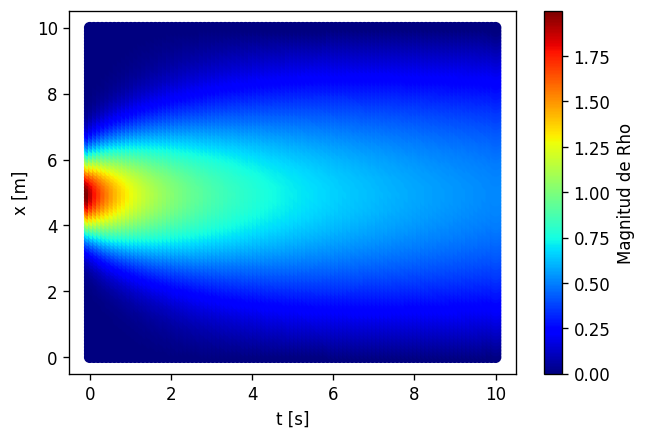

In [30]:
"""
Representación en 2D por medio de superficies de contorno.
"""
fig = plt.figure(dpi = 120,)
plt.xlabel("t [s]")
plt.ylabel("x [m]")
plt.scatter(T,X,c=Z,cmap="jet")
plt.colorbar(label="Magnitud de Rho")
plt.show()

# Método 2:

## Análisis de resultados: